In [20]:
from sklearn.datasets import fetch_california_housing

california_housing = fetch_california_housing(as_frame=True)

In [21]:
california_housing.data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [22]:
california_housing.frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


SEQUENTIAL API

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt

In [25]:
import tensorflow

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

In [26]:
X_train_full, X_test, y_train_full, y_test = train_test_split(california_housing.data, california_housing.target)

In [27]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

In [28]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_valid = scaler.transform(X_valid)

In [29]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation='relu', input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])


model.compile(loss = 'mean_squared_error', optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001), metrics = ['mse'])

In [30]:
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

Epoch 1/20
363/363 [==============================] - 1s 3ms/step - loss: 4.2684 - mse: 4.2684 - val_loss: 3.3671 - val_mse: 3.3671
Epoch 2/20
363/363 [==============================] - 1s 3ms/step - loss: 2.8975 - mse: 2.8975 - val_loss: 2.2903 - val_mse: 2.2903
Epoch 3/20
363/363 [==============================] - 1s 3ms/step - loss: 2.0632 - mse: 2.0632 - val_loss: 1.6560 - val_mse: 1.6560
Epoch 4/20
363/363 [==============================] - 1s 3ms/step - loss: 1.5589 - mse: 1.5589 - val_loss: 1.2693 - val_mse: 1.2693
Epoch 5/20
363/363 [==============================] - 1s 4ms/step - loss: 1.2465 - mse: 1.2465 - val_loss: 1.0319 - val_mse: 1.0319
Epoch 6/20
363/363 [==============================] - 2s 5ms/step - loss: 1.0494 - mse: 1.0494 - val_loss: 0.8833 - val_mse: 0.8833
Epoch 7/20
363/363 [==============================] - 2s 5ms/step - loss: 0.9207 - mse: 0.9207 - val_loss: 0.7872 - val_mse: 0.7872
Epoch 8/20
363/363 [==============================] - 2s 5ms/step - loss: 0.

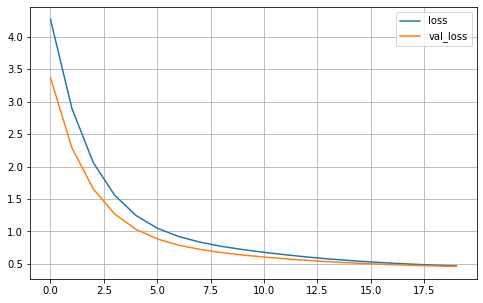

In [31]:
pd.DataFrame(history.history)[['loss', 'val_loss']].plot(figsize=(8,5))
plt.grid(True)
plt.show()

In [32]:
mse_test = model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 2ms/step - loss: 0.5322 - mse: 0.5322


the model has decent accuracy

FUNCTIONAL API

In [33]:
input_A = keras.layers.Input(shape=[5])
input_B = keras.layers.Input(shape=[6])
hidden_LAYER1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden_LAYER2 = keras.layers.Dense(30, activation="relu")(hidden_LAYER1)
concat = keras.layers.concatenate([input_A, hidden_LAYER2])
output = keras.layers.Dense(1)(concat)
model1 = keras.models.Model(inputs=[input_A, input_B], outputs=[output])

In [34]:
model1.compile(loss="mse", optimizer="adam")

In [35]:
X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

history1 = model1.fit((X_train_A, X_train_B), y_train, epochs=20,
                    validation_data=((X_valid_A, X_valid_B), y_valid))
mse_test = model1.evaluate((X_test_A, X_test_B), y_test)
y_pred = model1.predict((X_new_A, X_new_B))

Epoch 1/20
363/363 [==============================] - 2s 3ms/step - loss: 1.1613 - val_loss: 0.5196
Epoch 2/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4624 - val_loss: 0.4426
Epoch 3/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4226 - val_loss: 0.4268
Epoch 4/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4045 - val_loss: 0.4272
Epoch 5/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3985 - val_loss: 0.4048
Epoch 6/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3910 - val_loss: 0.4006
Epoch 7/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3743 - val_loss: 0.3960
Epoch 8/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3726 - val_loss: 0.3811
Epoch 9/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3610 - val_loss: 0.3785
Epoch 10/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3602 - val_loss: 0.3704

In [36]:
mse_test = model1.evaluate((X_test_A, X_test_B), y_test)

162/162 [==============================] - 0s 2ms/step - loss: 0.3526


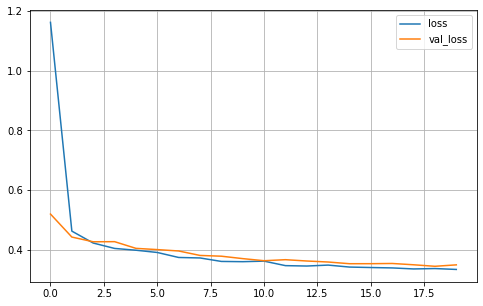

In [37]:
pd.DataFrame(history1.history)[['loss', 'val_loss']].plot(figsize=(8,5))
plt.grid(True)
plt.show()

**conclusion**
the functional api model is better as it has lower mse than that of the sequential model.